In [1]:
import os
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import cpi
import pymongo
from tqdm import tqdm
from scipy import stats
import math
import numpy as np
import pandas as pd
import json

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
db = myclient["imdb"]
imdb = db['imdb_cleaned']

In [3]:
num_movies = imdb.count_documents({})
num_movies

8181

In [4]:
def getMovie(imdb_id):
    for x in imdb.find({'imdb_id': imdb_id}):
        return x
    return None

In [7]:
genre_features = {}
with open('SavedFeatures/genre_features.json', 'r') as f:
    genre_features = json.load(f)

In [8]:
len(genre_features.keys())

23

In [11]:
genre = genre_features['Action']

In [12]:
genre

udget': 742129045,
   'num_raters': 1651979},
  '1989': {'num_movies': 37,
   'sum_rating': 228.79999999999995,
   'sum_revenue': 4318716655,
   'sum_budget': 1256668432,
   'num_raters': 2122606},
  '1990': {'num_movies': 34,
   'sum_rating': 210.70000000000002,
   'sum_revenue': 4458023048,
   'sum_budget': 1518212635,
   'num_raters': 1915483},
  '1991': {'num_movies': 31,
   'sum_rating': 192.0,
   'sum_revenue': 3740050794,
   'sum_budget': 1418329870,
   'num_raters': 2161464},
  '1992': {'num_movies': 26,
   'sum_rating': 163.80000000000004,
   'sum_revenue': 3627965796,
   'sum_budget': 1124158386,
   'num_raters': 1559518},
  '1993': {'num_movies': 30,
   'sum_rating': 188.29999999999998,
   'sum_revenue': 4969725203,
   'sum_budget': 1325411413,
   'num_raters': 2615084},
  '1994': {'num_movies': 33,
   'sum_rating': 193.9,
   'sum_revenue': 4743404231,
   'sum_budget': 1904024662,
   'num_raters': 2291189},
  '1995': {'num_movies': 38,
   'sum_rating': 229.20000000000005,
  

In [24]:
rolling_year = 5
present = 2020
first_movie_year = 1967

for year in genre['year-wise-performance']:
    if(genre['year-wise-performance'][year]['num_movies'] != 0):
        first_movie_year = int(year)
        break
first_movie_year

1967

In [25]:
def getValues(st_year, nd_year, entity):
    info = {}
    info['total_revenue'] = 0
    info['total_budget'] = 0
    info['num_movies'] = 0
    info['num_raters'] = 0
    for year in range(st_year, nd_year+1):
        year = str(year)
        info['total_revenue']   += entity['year-wise-performance'][year]['sum_revenue']
        info['total_budget']    += entity['year-wise-performance'][year]['sum_budget']
        info['num_movies']      += entity['year-wise-performance'][year]['num_movies']
        info['num_raters']      += entity['year-wise-performance'][year]['num_raters']
    return info

In [26]:
getValues(first_movie_year, present, genre)

{'total_revenue': 344028433728,
 'total_budget': 124427271899,
 'num_movies': 2031,
 'num_raters': 245921478}

In [27]:
year_label = []
revenue_arr = []
budget_arr = []
num_movie_arr = []

for year in range(first_movie_year+rolling_year-1, present):
    st_year = year - rolling_year + 1
    nd_year = year
    info = getValues(st_year, nd_year, genre)
    year_label.append('{} - {}'.format(st_year, nd_year))

    if(info['num_movies'] != 0):
        revenue_arr.append(info['total_revenue']/info['num_movies'])
        budget_arr.append(info['total_budget']/info['num_movies'])
        num_movie_arr.append(info['num_movies'])
    else:
        revenue_arr.append(0)
        budget_arr.append(0)
        num_movie_arr.append(0) 

In [28]:
def plotFigure(xrr, yrr, zrr):
    fig = make_subplots()
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=yrr, 
            name="Revenue",
            mode='lines+markers',
            line_color='rgba(102, 0, 204, .8)'
        ),
    )
    
    fig.add_trace(
        go.Scatter(
            x=xrr, 
            y=zrr, 
            name="Budget",
            mode='lines+markers',
            line_color='rgba(153, 0, 51, .8)'
        ),
    )
    return fig

In [29]:
fig = plotFigure(year_label, revenue_arr, budget_arr)
fig.show()

# Star Power -- KS Test

In [34]:
genre_track = {}

for key in genre_features:
    print(key, genre_features[key]['total_movies'], genre_features[key]['total_revenue'])
    budget_track[key] = []
    for movie_id  in genre_features[key]['movie_arr']:
        genre_track[key].append(getMovie(movie_id)['cleaned_Revenue'])

Action 2031 344028433728
Adventure 1442 368434666645
Sci-Fi 937 192370542695
Comedy 3066 300543122807
Fantasy 980 196217869415
Drama 4397 297702982585
Mystery 902 78119183631
Thriller 2516 226451806561
Romance 1726 138609334264
Crime 1623 114609897853
Horror 982 57278533140
Family 831 168363301205
Animation 397 100705459067
Musical 193 37118562572
Music 310 23906606413
Biography 535 33918946622
Western 136 12653581660
Sport 295 20986052919
War 344 27884421629
History 365 24291539586
Documentary 167 2604675529
News 5 64370400
Short 2 1481116


In [36]:
genre_track = budget_track

In [50]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(round(dct2D[ik][jk], 3))
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    plt.figure(figsize = (20,14))
    sn.heatmap(df_cm, annot=True)
    plt.show()

In [44]:
from scipy.stats import ks_2samp
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
ks_2samp(genre_track['Action'], genre_track['Adventure'])

KstestResult(statistic=0.13120932071613978, pvalue=4.0756287233989497e-13)

In [48]:
pvalue = {}

for ik in genre_track:
    pvalue[ik] = {}
    for jk in genre_track:
        ks2 = ks_2samp(genre_track[ik], genre_track[jk])
        pvalue[ik][jk] = ks2.pvalue
        if(ik == jk):
            break

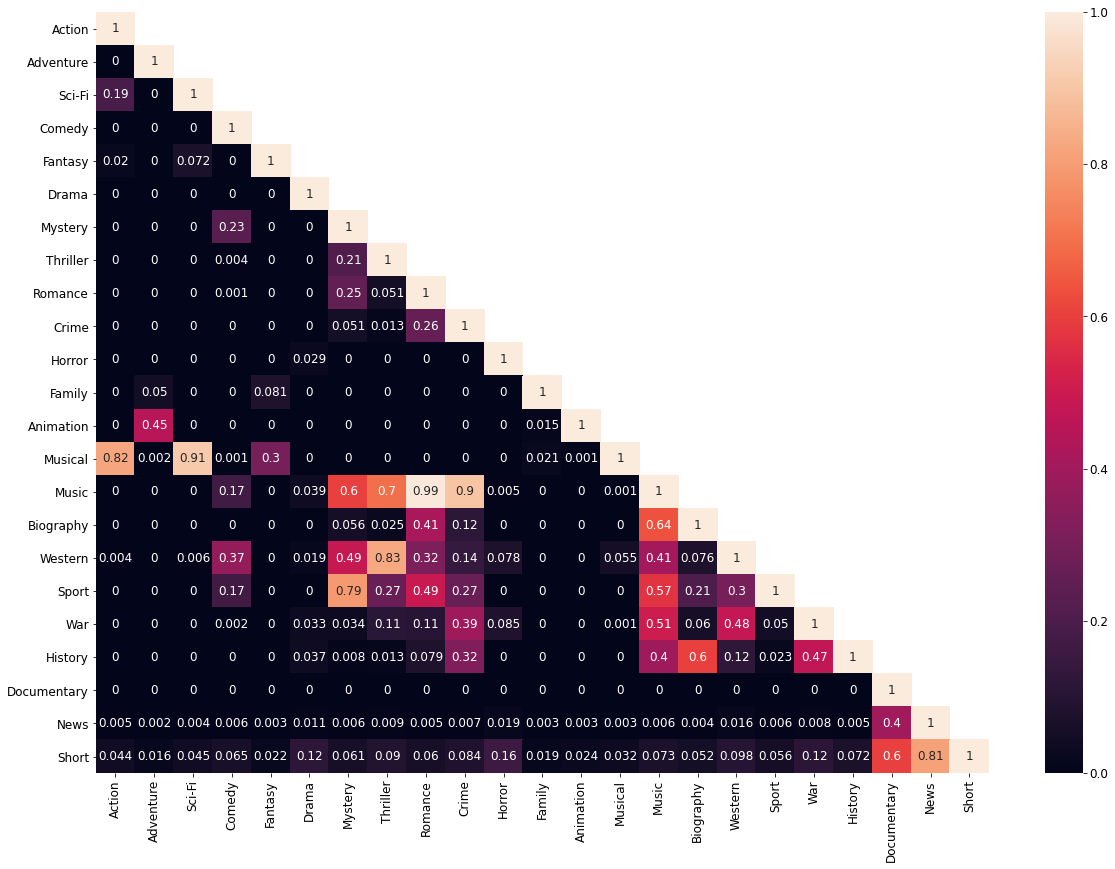

In [53]:
plt.rcParams.update({'font.size': 12})
plotMatrix(pvalue)

In [60]:
genre_avg = {}
idx = 0
for key in genre_features:
    # print(key, genre_features[key]['total_revenue']/genre_features[key]['total_movies'])
    genre_avg[key] = (idx, genre_features[key]['total_revenue']/genre_features[key]['total_movies'])
    idx += 1

In [61]:
genre_avg

{'Action': (0, 169388692.13589364),
 'Adventure': (1, 255502542.74965325),
 'Sci-Fi': (2, 205304741.40341514),
 'Comedy': (3, 98024501.8939987),
 'Fantasy': (4, 200222315.72959185),
 'Drama': (5, 67705931.90470776),
 'Mystery': (6, 86606633.73725055),
 'Thriller': (7, 90004692.5918124),
 'Romance': (8, 80306682.65585168),
 'Crime': (9, 70616080.00800985),
 'Horror': (10, 58328445.15274949),
 'Family': (11, 202603250.5475331),
 'Animation': (12, 253666143.74559194),
 'Musical': (13, 192324158.4041451),
 'Music': (14, 77118085.2032258),
 'Biography': (15, 63399900.22803738),
 'Western': (16, 93041041.61764705),
 'Sport': (17, 71139162.43728814),
 'War': (18, 81059365.2005814),
 'History': (19, 66552163.24931507),
 'Documentary': (20, 15596859.45508982),
 'News': (21, 12874080.0),
 'Short': (22, 740558.0)}